In [ ]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the images dataset on Google Drive
data_dir = '/content/drive/My Drive/chest_xray/'

# Verify the structure
os.listdir(data_dir)

['val', 'train', 'test']

In [ ]:
# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,  # Random rotations
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest'  # Fill missing pixels
)

# Training data
train_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary'
)

# Validation data
val_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Test data (no augmentation applied)
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Flatten data for logistic regression
#X_train = np.concatenate([train_data[i][0] for i in range(len(train_data))])
#y_train = np.concatenate([train_data[i][1] for i in range(len(train_data))])

#X_test = np.concatenate([test_data[i][0] for i in range(len(test_data))])
#y_test = np.concatenate([test_data[i][1] for i in range(len(test_data))])

#X_train_flat = X_train.reshape(X_train.shape[0], -1)
#X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train logistic regression model
#logreg = LogisticRegression(max_iter=1000)
#logreg.fit(X_train_flat, y_train)

# Predict using logistic regression
#y_pred_logreg = logreg.predict(X_test_flat)


In [ ]:
# Process only a subset of batches for faster execution
subset_size = 10  # Number of batches to process

X_train = np.concatenate([train_data[i][0] for i in range(subset_size)])
y_train = np.concatenate([train_data[i][1] for i in range(subset_size)])

X_test = np.concatenate([test_data[i][0] for i in range(subset_size)])
y_test = np.concatenate([test_data[i][1] for i in range(subset_size)])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (320, 150, 150, 3)
y_train shape: (320,)
X_test shape: (320, 150, 150, 3)
y_test shape: (320,)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_flat, y_train)

# Predict using logistic regression
y_pred_logreg = logreg.predict(X_test_flat)

In [ ]:
print("Unique classes in y_train:", np.unique(y_train, return_counts=True))


Unique classes in y_train: (array([0., 1.], dtype=float32), array([ 82, 238]))


In [ ]:
print("Class indices:", train_data.class_indices)  # Check mapping for NORMAL and PNEUMONIA
print("Samples per class in training data:", train_data.classes)  # Check all labels


Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}
Samples per class in training data: [0 0 0 ... 1 1 1]


In [ ]:
print("Total training samples:", len(train_data.classes))
print("Class distribution in training data:", np.unique(train_data.classes, return_counts=True))


Total training samples: 5216
Class distribution in training data: (array([0, 1], dtype=int32), array([1341, 3875]))


In [ ]:
# Check class indices
print("Class indices (mapping):", train_data.class_indices)

# Check the number of samples per class
print("Classes in training data:", train_data.classes)
print("Unique labels and counts in training data:", np.unique(train_data.classes, return_counts=True))


Class indices (mapping): {'NORMAL': 0, 'PNEUMONIA': 1}
Classes in training data: [0 0 0 ... 1 1 1]
Unique labels and counts in training data: (array([0, 1], dtype=int32), array([1341, 3875]))


In [ ]:
import os

print("Train folder exists:", os.path.exists(os.path.join(data_dir, 'train')))
print("Validation folder exists:", os.path.exists(os.path.join(data_dir, 'val')))
print("Test folder exists:", os.path.exists(os.path.join(data_dir, 'test')))


Train folder exists: True
Validation folder exists: True
Test folder exists: True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators
datagen = ImageDataGenerator(rescale=1.0/255)

train_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Load VGG16 pretrained model
# base_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights="imagenet")
# base_model.trainable = False  # Freeze base layers

# Build the CNN model
# model_vgg16 = Sequential([
   #  base_model,
    # Flatten(),
    # Dense(256, activation='relu'),
    # Dense(1, activation='sigmoid')  # Binary classification
# ])

# Compile the model
# model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model_vgg16.fit(train_data, validation_data=val_data, epochs=5)

# Predict using VGG16
# y_pred_vgg16 = model_vgg16.predict(test_data)
# y_pred_vgg16 = (y_pred_vgg16 > 0.5).astype(int).flatten()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load VGG16 pretrained model
base_model = VGG16(include_top=False, input_shape=(150, 150, 3), weights="imagenet")

# Optimize: Unfreeze only the top layers for fine-tuning
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

# Build the CNN model
model_vgg16 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Optimize: Replace Flatten with Global Average Pooling
    Dense(128, activation='relu'),  # Optimize: Reduce dense layer size to 128 units
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with a lower learning rate for transfer learning
model_vgg16.compile(
    optimizer=Adam(learning_rate=1e-4),  # Lower learning rate for better transfer learning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model for fewer epochs
history = model_vgg16.fit(
    train_data,
    validation_data=val_data,
    epochs=3,  # Optimize: Fewer epochs for faster training
)

# Predict using VGG16
y_pred_vgg16 = model_vgg16.predict(test_data)
y_pred_vgg16 = (y_pred_vgg16 > 0.5).astype(int).flatten()

# Evaluate the model on the test data
test_loss, test_accuracy = model_vgg16.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 1618s 10s/step - accuracy: 0.9270 - loss: 0.1782 - val_accuracy: 0.7500 - val_loss: 0.3274
Epoch 2/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 1659s 10s/step - accuracy: 0.9806 - loss: 0.0536 - val_accuracy: 0.8750 - val_loss: 0.2703
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 1600s 10s/step - accuracy: 0.9888 - loss: 0.0347 - val_accuracy: 0.8125 - val_loss: 0.4479
20/20 ━━━━━━━━━━━━━━━━━━━━ 162s 8s/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.5661 - loss: 1.8757
Test Loss: 1.1364432573318481
Test Accuracy: 0.7532051205635071


In [ ]:
print("Number of training samples:", train_data.samples)
print("Number of validation samples:", val_data.samples)


Number of training samples: 5216
Number of validation samples: 16


In [ ]:
import os

print("Train folder exists:", os.path.exists(os.path.join(data_dir, 'train')))
print("Validation folder exists:", os.path.exists(os.path.join(data_dir, 'val')))


Train folder exists: True
Validation folder exists: True


In [ ]:
# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train_flat, y_train)

# Predict using random forest
y_pred_rf = rf.predict(X_test_flat)


In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred_vgg16:", y_pred_vgg16.shape)


Shape of y_test: (320,)
Shape of y_pred_vgg16: (624,)


In [ ]:
# Rebuild y_test from test_data
y_test = test_data.classes  # Extract labels directly from the test_data generator
print("Corrected y_test shape:", y_test.shape)


Corrected y_test shape: (624,)


In [ ]:
# Generate predictions for all samples in test_data
y_pred_vgg16 = model_vgg16.predict(test_data, steps=len(test_data), verbose=1)
y_pred_vgg16 = (y_pred_vgg16 > 0.5).astype(int).flatten()
print("Corrected y_pred_vgg16 shape:", y_pred_vgg16.shape)


20/20 ━━━━━━━━━━━━━━━━━━━━ 162s 8s/step
Corrected y_pred_vgg16 shape: (624,)


In [ ]:
print("Final y_test shape:", y_test.shape)
print("Final y_pred_vgg16 shape:", y_pred_vgg16.shape)


Final y_test shape: (624,)
Final y_pred_vgg16 shape: (624,)


In [ ]:
from sklearn.metrics import f1_score, classification_report

# Evaluate VGG16 Model
f1_vgg16 = f1_score(y_test, y_pred_vgg16)
print("F1 Score - VGG16 Model:", f1_vgg16)

# Classification Report
report_vgg16 = classification_report(y_test, y_pred_vgg16)
print("\nClassification Report - VGG16 Model:\n", report_vgg16)


F1 Score - VGG16 Model: 0.8351177730192719

Classification Report - VGG16 Model:
               precision    recall  f1-score   support

           0       1.00      0.34      0.51       234
           1       0.72      1.00      0.84       390

    accuracy                           0.75       624
   macro avg       0.86      0.67      0.67       624
weighted avg       0.82      0.75      0.71       624



In [ ]:
# Ensure test_data has shuffle=False
test_data = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Disable shuffling
)


Found 624 images belonging to 2 classes.


In [ ]:
# Ensure X_test_flat includes all samples
X_test = np.concatenate([test_data[i][0] for i in range(len(test_data))])
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Verify the shape
print("X_test_flat shape:", X_test_flat.shape)


X_test_flat shape: (624, 67500)


In [ ]:
# Regenerate predictions for all samples
y_pred_logreg = logreg.predict(X_test_flat)
y_pred_rf = rf.predict(X_test_flat)

# Verify shapes
print("Updated y_test shape:", y_test.shape)
print("Updated y_pred_logreg shape:", y_pred_logreg.shape)
print("Updated y_pred_rf shape:", y_pred_rf.shape)


Updated y_test shape: (624,)
Updated y_pred_logreg shape: (624,)
Updated y_pred_rf shape: (624,)


In [ ]:
if len(y_test) == len(y_pred_logreg) == len(y_pred_rf):
    print("Shapes are consistent! Ready for evaluation.")
else:
    print("Shapes are still inconsistent. Check data creation and predictions.")


Shapes are consistent! Ready for evaluation.


In [ ]:
from sklearn.metrics import f1_score, classification_report

# Evaluate Logistic Regression
print("F1 Score - Logistic Regression:", f1_score(y_test, y_pred_logreg))
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

# Evaluate Random Forest
print("F1 Score - Random Forest:", f1_score(y_test, y_pred_rf))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))


F1 Score - Logistic Regression: 0.7737068965517241

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.64      0.24      0.34       234
           1       0.67      0.92      0.77       390

    accuracy                           0.66       624
   macro avg       0.65      0.58      0.56       624
weighted avg       0.66      0.66      0.61       624

F1 Score - Random Forest: 0.7889908256880734

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.13      0.22       234
           1       0.65      0.99      0.79       390

    accuracy                           0.67       624
   macro avg       0.78      0.56      0.51       624
weighted avg       0.75      0.67      0.58       624



In [ ]:
# Evaluate Logistic Regression
#print("F1 Score - Logistic Regression:", f1_score(y_test, y_pred_logreg))

# Evaluate VGG16 Model
#print("F1 Score - VGG16 Model:", f1_score(y_test, y_pred_vgg16))

# Evaluate Random Forest
#print("F1 Score - Random Forest:", f1_score(y_test, y_pred_rf))

# Classification Report for each model
#print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
#print("\nClassification Report - VGG16:\n", classification_report(y_test, y_pred_vgg16))
#rint("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))


In [ ]:
!pip install shap


In [ ]:
import shap


Explaining Logistic Regression model using SHAP...


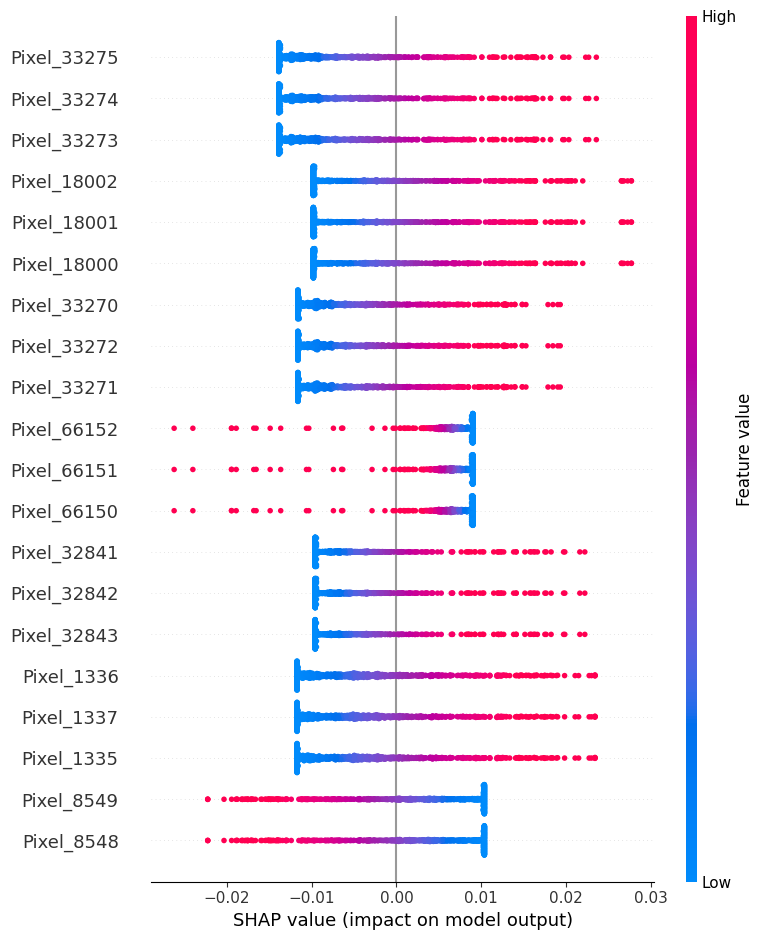

In [ ]:
import shap
import matplotlib.pyplot as plt

# Task 3: SHAP Explanation for Logistic Regression
print("Explaining Logistic Regression model using SHAP...")
logreg_explainer = shap.LinearExplainer(logreg, X_train_flat)
shap_values_logreg = logreg_explainer.shap_values(X_test_flat)

# Visualize SHAP values for Logistic Regression
shap.summary_plot(shap_values_logreg, X_test_flat, feature_names=["Pixel_" + str(i) for i in range(X_test_flat.shape[1])])




Explaining Deep Learning VGG16 model using SHAP...


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


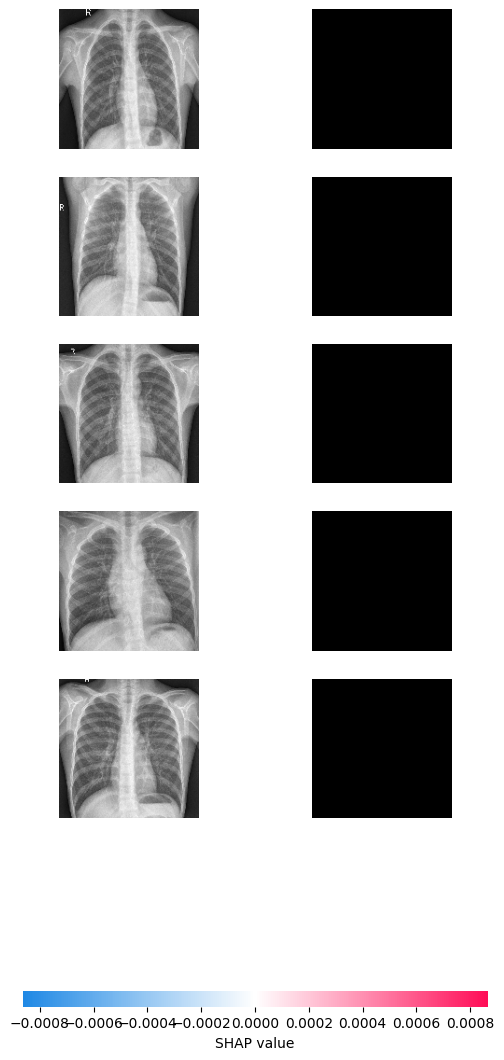

In [ ]:
import shap
import tensorflow as tf

# Reduce input size for explanation
X_test_subset = X_test[:5]  # small subset for explanation
background = X_train[:50]  # Small background dataset

# Use SHAP DeepExplainer
print("Explaining Deep Learning VGG16 model using SHAP...")
vgg16_explainer = shap.DeepExplainer(model_vgg16, background)
shap_values_vgg16 = vgg16_explainer.shap_values(X_test_subset)

# Visualize SHAP values for VGG16
shap.image_plot(shap_values_vgg16, X_test_subset)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Ensure X_train_flat and y_train are defined
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_flat, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
print("Shape of X_test_flat:", X_test_flat.shape)
print("Shape of shap_values_rf[1]:", shap_values_rf[1].shape)


Shape of X_test_flat: (624, 67500)
Shape of shap_values_rf[1]: (67500, 2)


In [ ]:
import shap

# Initialize SHAP Linear Explainer
logreg_explainer = shap.LinearExplainer(logreg, X_train_flat)

# Compute SHAP values for the test set
shap_values_logreg = logreg_explainer.shap_values(X_test_flat)

print("SHAP values shape (Logistic Regression):", shap_values_logreg.shape)


SHAP values shape (Logistic Regression): (624, 67500)


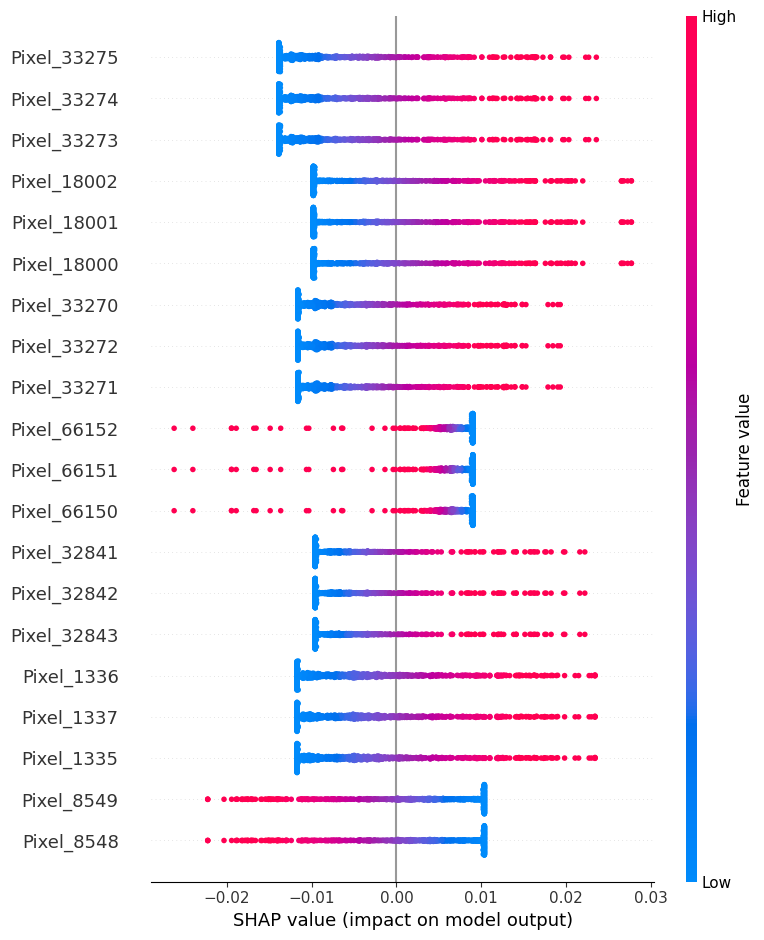

In [ ]:
shap.summary_plot(shap_values_logreg, X_test_flat, feature_names=["Pixel_" + str(i) for i in range(X_test_flat.shape[1])])


In [ ]:
# Ensure data types are float64 for SHAP
shap_values_logreg = shap_values_logreg.astype(np.float64)
X_test_flat = X_test_flat.astype(np.float64)


In [ ]:
shap.force_plot(
    logreg_explainer.expected_value,  # Base value from SHAP
    shap_values_logreg[0],            # SHAP values for the first sample
    X_test_flat[0]                    # Input data for the first sample
)


In [ ]:
# Save force plot as HTML
shap_html = shap.force_plot(
    logreg_explainer.expected_value,
    shap_values_logreg[0],
    X_test_flat[0]
)
shap.save_html("force_plot_logreg.html", shap_html)


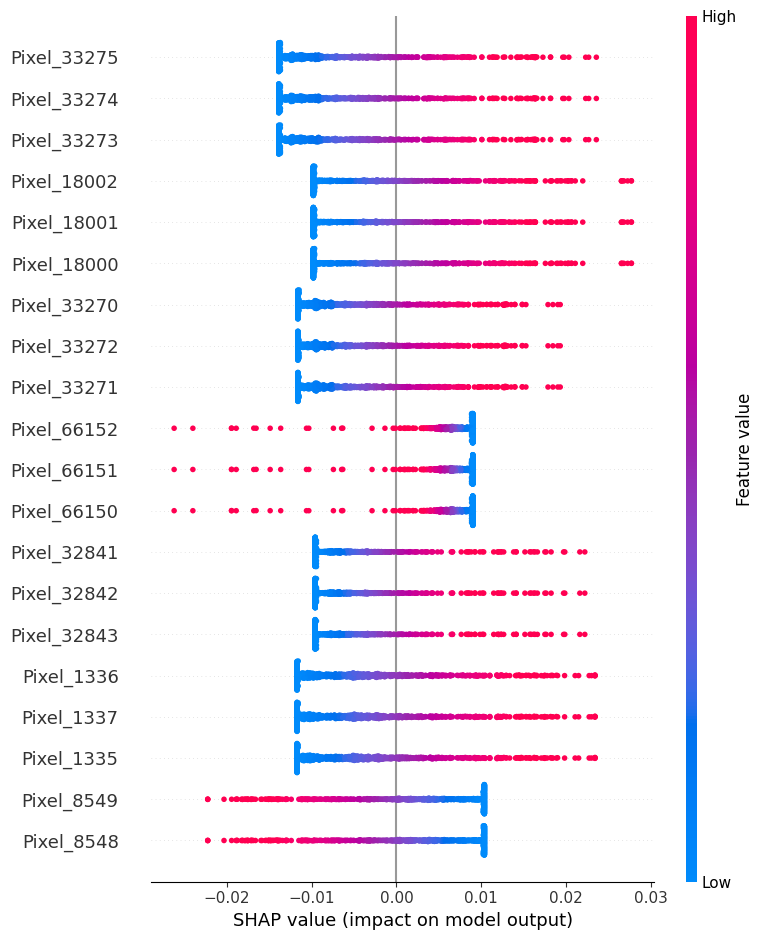

In [ ]:
shap.summary_plot(shap_values_logreg, X_test_flat, feature_names=["Pixel_" + str(i) for i in range(X_test_flat.shape[1])])


In [ ]:
# SHAP visualization
shap.summary_plot(shap_values_logreg, X_test_flat)

# LIME visualization
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=10,
    hide_rest=False
)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.show()
